In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Imports and treatments

In [10]:
#import raw data

data_raw = pd.read_csv('marketing_campaign.csv', sep=';' )

*columns description*

| Column | Description |
| ----------- | ----------- |
| AcceptedCmp1 | 1 if customer accepted the offer in the 1st campaign, 0 otherwise |
| AcceptedCmp2 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp3 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp4 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| AcceptedCmp5 | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise |
| Response (target) | 1 if customer accepted the offer in the last campaign, 0 otherwise |
| Complain | 1 if customer complained in the last 2 years |
| DtCustomer | date of customer’s enrolment with the company |
| Education | customer’s level of education |
| Marital | customer’s marital status |
| Kidhome | number of small children in customer’s household |
| Teenhome | number of teenagers in customer’s household |
| Income | customer’s yearly household income |  
| MntFishProducts | amount spent on fish products in the last 2 years |  
| MntMeatProducts | amount spent on meat products in the last 2 years | 
| MntFruits | amount spent on fruits products in the last 2 years |
| MntSweetProducts | amount spent on sweet products in the last 2 years |
| MntWines | amount spent on wine products in the last 2 years |
| MntGoldProds | amount spent on gold products in the last 2 years |
| NumDealsPurchases | number of purchases made with discount |
| NumCatalogPurchases | number of purchases made using catalogue |
| NumStorePurchases | number of purchases made directly in stores |
| NumWebPurchases | number of purchases made through company’s web site |
| NumWebVisitsMonth | number of visits to company’s web site in the last month |
| Recency | number of days since the last purchase |


In [3]:
data_raw.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
# data backup 

data = data_raw.copy()

In [ ]:
from datetime import datetime 

# create column to actual year and actual date
current_year = datetime.now().year
data['Current_Year'] = current_year

current_date = pd.to_datetime('now').strftime("%Y-%m-%d")
data['Current_Date'] = current_date
data['Current_Date'] = pd.to_datetime(data['Current_Date'])

# create age column
data['Age'] = data['Current_Year'] - data['Year_Birth']

# creat column to show how long the client is actual a client
data[['Current_Date','Dt_Customer']] = data[['Current_Date','Dt_Customer']].apply(pd.to_datetime)
data['House_Time'] = ((data['Current_Date'] - data['Dt_Customer']) / np.timedelta64(1, 'M'))
data['House_Time'] = data['House_Time'].astype('int64')

data = data[data['Marital_Status'] != 'Absurd']

In [13]:
# function to create rate age

def age_rate(x):
    if x <= 20:
        return '<= 20'
    if x <= 30:
        return '21 - 30'    
    if x <= 40:
        return '31 - 40' 
    if x <= 50:
        return '41 - 50'    
    if x <= 60:
        return '51 - 60'    
    else:
        return ' > 60'

data['Age_Rate'] =  data['Age'].apply(age_rate)

In [14]:
# function to creat income rate

def income_rate(x):
    if x <= 10000:
        return '<= 10000'
    if x <= 20000:
        return '10001 - 20000'    
    if x <= 30000:
        return '20001 - 30000' 
    if x <= 40000:
        return '30001 - 40000'    
    if x <= 50000:
        return '40001 - 50000'    
    if x <= 60000:
        return '50001 - 60000'  
    if x <= 70000:
        return '60001 - 70000'  
    if x <= 80000:
        return '70001 - 80000'  
    else:
        return ' > 80000'

data['Income_Rate'] =  data['Income'].apply(income_rate)

# 2) EDA

In [8]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Current_Year,Age,House_Time
count,2238.000000,2238.000000,2214.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,...,2238.000000,2238.000000,2238.000000,2238.000000,2238.0,2238.0,2238.000000,2238.0,2238.000000,2238.000000
mean,5591.749330,1968.800268,52229.077687,0.444593,0.506702,49.105898,303.889634,26.250223,166.819929,37.375335,...,0.072386,0.063896,0.013405,0.009383,3.0,11.0,0.148794,2022.0,53.199732,112.776586
std,3247.694534,11.975906,25176.330210,0.538475,0.544571,28.974777,336.726585,39.749663,225.704653,54.421568,...,0.259184,0.244623,0.115026,0.096434,0.0,0.0,0.355964,0.0,11.975906,6.661705
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2022.0,26.000000,101.000000
25%,2826.750000,1959.000000,35265.000000,0.000000,0.000000,24.000000,23.250000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2022.0,45.000000,107.000000
50%,5458.500000,1970.000000,51371.000000,0.000000,0.000000,49.000000,173.000000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2022.0,52.000000,113.000000
75%,8429.250000,1977.000000,68487.000000,1.000000,1.000000,74.000000,504.750000,33.000000,231.750000,50.000000,...,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2022.0,63.000000,119.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2022.0,129.000000,124.000000


In [ ]:
#education

aux1 = data[data['AcceptedCmp1'] == 1].groupby(['Education'])['ID'].count()
aux2 = data[data['AcceptedCmp2'] == 1].groupby(['Education'])['ID'].count()
aux3 = data[data['AcceptedCmp3'] == 1].groupby(['Education'])['ID'].count()
aux4 = data[data['AcceptedCmp4'] == 1].groupby(['Education'])['ID'].count()
aux5 = data[data['AcceptedCmp5'] == 1].groupby(['Education'])['ID'].count()
aux_base = data.groupby(['Education'])['ID'].count()

# Merge orders data_
from functools import reduce

dfs = [aux1, aux2, aux3, aux4, aux5,aux_base]
df_education_comparison = reduce(lambda  left,right: pd.merge(
    left,right,on=['Education'], how='inner'), dfs)

df_education_comparison.columns = ['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5', 'qty_base' ]

#Marital_Status

aux1 = data[data['AcceptedCmp1'] == 1].groupby(['Marital_Status'])['ID'].count()
aux2 = data[data['AcceptedCmp2'] == 1].groupby(['Marital_Status'])['ID'].count()
aux3 = data[data['AcceptedCmp3'] == 1].groupby(['Marital_Status'])['ID'].count()
aux4 = data[data['AcceptedCmp4'] == 1].groupby(['Marital_Status'])['ID'].count()
aux5 = data[data['AcceptedCmp5'] == 1].groupby(['Marital_Status'])['ID'].count()

dfs = [aux1, aux2, aux3, aux4, aux5]
df_marital_status_comparison = reduce(lambda  left,right: pd.merge(
    left,right,on=['Marital_Status'], how='inner'), dfs)

df_marital_status_comparison.columns = ['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5']

#Age_Rate

aux1 = data[data['AcceptedCmp1'] == 1].groupby(['Age_Rate'])['ID'].count()
aux2 = data[data['AcceptedCmp2'] == 1].groupby(['Age_Rate'])['ID'].count()
aux3 = data[data['AcceptedCmp3'] == 1].groupby(['Age_Rate'])['ID'].count()
aux4 = data[data['AcceptedCmp4'] == 1].groupby(['Age_Rate'])['ID'].count()
aux5 = data[data['AcceptedCmp5'] == 1].groupby(['Age_Rate'])['ID'].count()

dfs = [aux1, aux2, aux3, aux4, aux5]
df_Age_Rate_comparison = reduce(lambda  left,right: pd.merge(
    left,right,on=['Age_Rate'], how='inner'), dfs)

df_Age_Rate_comparison.columns = ['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5']

#Income_Rate

aux1 = data[data['AcceptedCmp1'] == 1].groupby(['Income_Rate'])['ID'].count()
aux2 = data[data['AcceptedCmp2'] == 1].groupby(['Income_Rate'])['ID'].count()
aux3 = data[data['AcceptedCmp3'] == 1].groupby(['Income_Rate'])['ID'].count()
aux4 = data[data['AcceptedCmp4'] == 1].groupby(['Income_Rate'])['ID'].count()
aux5 = data[data['AcceptedCmp5'] == 1].groupby(['Income_Rate'])['ID'].count()

dfs = [aux1, aux2, aux3, aux4, aux5]
df_Income_Rate_comparison = reduce(lambda  left,right: pd.merge(
    left,right,on=['Income_Rate'], how='inner'), dfs)

df_Income_Rate_comparison.columns = ['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5']

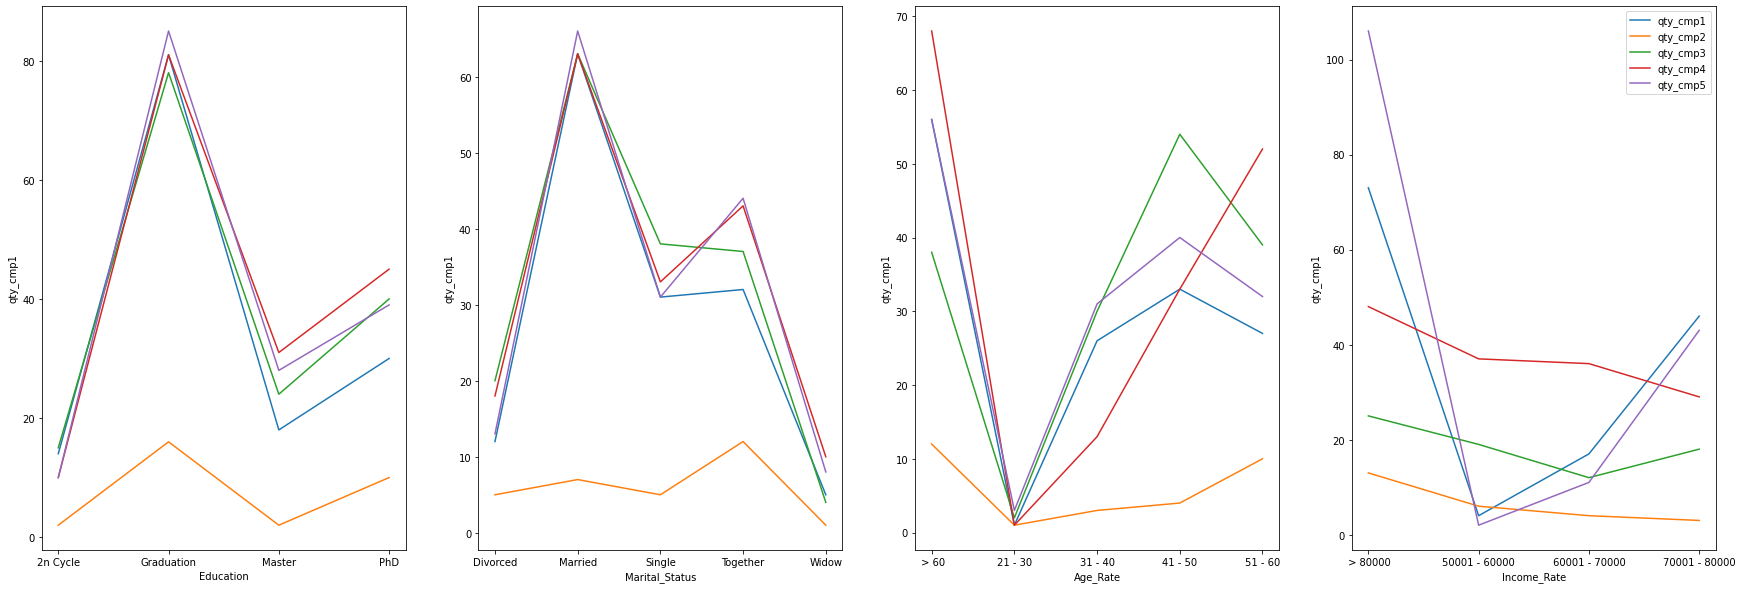

In [17]:
f, ax = plt.subplots(1,4,figsize=(30,10))

g1 = sns.lineplot(x='Education', y='qty_cmp1', ax=ax[0], data=df_education_comparison)
g1 = sns.lineplot(x='Education', y='qty_cmp2', ax=ax[0], data=df_education_comparison)
g1 = sns.lineplot(x='Education', y='qty_cmp3', ax=ax[0], data=df_education_comparison)
g1 = sns.lineplot(x='Education', y='qty_cmp4',ax=ax[0],  data=df_education_comparison)
g1 = sns.lineplot(x='Education', y='qty_cmp5',ax=ax[0],  data=df_education_comparison)
plt.legend(labels=['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5'])

g2 = sns.lineplot(x='Marital_Status', y='qty_cmp1', ax=ax[1], data=df_marital_status_comparison)
g2 = sns.lineplot(x='Marital_Status', y='qty_cmp2',ax=ax[1],  data=df_marital_status_comparison)
g2 = sns.lineplot(x='Marital_Status', y='qty_cmp3', ax=ax[1], data=df_marital_status_comparison)
g2 = sns.lineplot(x='Marital_Status', y='qty_cmp4',ax=ax[1],  data=df_marital_status_comparison)
g2 = sns.lineplot(x='Marital_Status', y='qty_cmp5',ax=ax[1],  data=df_marital_status_comparison)
plt.legend(labels=['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5'])

g3 = sns.lineplot(x='Age_Rate', y='qty_cmp1',ax=ax[2], data=df_Age_Rate_comparison)
g3 = sns.lineplot(x='Age_Rate', y='qty_cmp2',ax=ax[2], data=df_Age_Rate_comparison)
g3 = sns.lineplot(x='Age_Rate', y='qty_cmp3',ax=ax[2], data=df_Age_Rate_comparison)
g3 = sns.lineplot(x='Age_Rate', y='qty_cmp4', ax=ax[2],data=df_Age_Rate_comparison)
g3 = sns.lineplot(x='Age_Rate', y='qty_cmp5',ax=ax[2], data=df_Age_Rate_comparison)
g3 = plt.legend(labels=['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5'])

g4 = sns.lineplot(x='Income_Rate', y='qty_cmp1', ax=ax[3],data=df_Income_Rate_comparison)
g4 = sns.lineplot(x='Income_Rate', y='qty_cmp2',ax=ax[3], data=df_Income_Rate_comparison)
g4 = sns.lineplot(x='Income_Rate', y='qty_cmp3',ax=ax[3], data=df_Income_Rate_comparison)
g4 = sns.lineplot(x='Income_Rate', y='qty_cmp4',ax=ax[3], data=df_Income_Rate_comparison)
g4 = sns.lineplot(x='Income_Rate', y='qty_cmp5',ax=ax[3], data=df_Income_Rate_comparison)
plt.legend(labels=['qty_cmp1', 'qty_cmp2', 'qty_cmp3', 'qty_cmp4','qty_cmp5'])


In [ ]:
# outputs: 
## we see that promotion 2 was pretty bad in all segments, just not in the segment with people with annual income between 50k and 60k
## people who are educated, married, and between the ages of 41 and 50 have a predisposition to accept more campaigns
## people aged 21 to 30 did not engage with any of the campaigns